<a href="https://colab.research.google.com/github/shaniaking/Sentiment-Analysis-DS340W/blob/Week-1-Code-Implementation/Sentiment_Analysis_of_IMDB_Movie_Reviews_(Week_1_Implementation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC


#Load Dataset
df = pd.read_csv("IMDB Dataset.csv")

#Label Data
X = df["review"]
y = df["sentiment"]

#Split Data
  #Validation
X_temp, X_validation, y_temp, y_validation = train_test_split(X, y, test_size=0.1, random_state=42)
  #Remaining goes into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.22, random_state=42)

print(f"Training Data: {len(X_train)}")
print(f"Testing Data: {len(X_test)}")
print(f"Validation Data: {len(X_validation)}")

Training Data: 35100
Testing Data: 9900
Validation Data: 5000


In [9]:
#Preproccessing
  #Remove punctuation and symbols and convert to lowercase. Also remove
  #stopwords using NLTK package
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
def preprocess_review(text):
    #Convert to lowercase
    text = text.lower()
    #Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    #Split
    words = text.split()
    #Remove stopwords
    filtered = [word for word in words if word not in stop_words]
    #Join back into string
    text = ' '.join(filtered)
    return text
X_train = X_train.apply(preprocess_review)
X_test = X_test.apply(preprocess_review)
#X_val = X_val.apply(preprocess_review) - still unseen
#Show review rows
print(X_train)
print(X_test)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


13672    melvyn douglas joan blondell costar amazing mr...
8077     rare nowadays find romantic comedy isnt incred...
20027    chip foose absolute genius end result projects...
40822    watching movie getting increasingly bored sill...
30437    movie downright horrible movie hour long 25min...
                               ...                        
10732    one biggest pieces crap ever watch mean seriou...
30306    investigative reporter darren mcgavin carl kol...
22813    something really love womans short films elusi...
5329     movie plain bad every cop movie cliché present...
7871     three stooges always many actors loved love ev...
Name: review, Length: 35100, dtype: object
32924    br br ignored implausibilities actually fairly...
17135    boston legal turned tail headed barn door th p...
40970    bought dvd seeing highly ranked short 20 minut...
48566    madefortv rather needless scifi channel retell...
13545    expected fame uplifting film ended opposite ov...
             

In [10]:
#TF-IDF Vectorization
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=10000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)

  #Transform test set
X_test_tfidf = vectorizer.transform(X_test)

#Validation set remains untouched until final evaluation
#X_val_tfidf = vectorizer.transform(X_val)

In [11]:
#Model Training
#Logistic Regression
  #Initialize Logistic Regression model
lr = LogisticRegression(max_iter=200, random_state=0)

  #Train on training TF-IDF features
lr.fit(X_train_tfidf, y_train)

  #Predict on test set
y_test_pred_lr = lr.predict(X_test_tfidf)

  #Calculate metrics for positive class
precision_lr = precision_score(y_test, y_test_pred_lr, pos_label='positive')
recall_lr = recall_score(y_test, y_test_pred_lr, pos_label='positive')
f1_lr = f1_score(y_test, y_test_pred_lr, pos_label='positive')

  #Print results
print("Logistic Regression Performance on Test Set:")
print(f"Precision: {precision_lr:.3f}")
print(f"Recall: {recall_lr:.3f}")
print(f"F1-score: {f1_lr:.3f}\n")

#Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=0)

  #Train the model
rf.fit(X_train_tfidf, y_train)

  #Predict on the test set
y_test_pred_rf = rf.predict(X_test_tfidf)

  #Calculate metrics for positive class
precision_rf = precision_score(y_test, y_test_pred_rf, pos_label='positive')
recall_rf = recall_score(y_test, y_test_pred_rf, pos_label='positive')
f1_rf = f1_score(y_test, y_test_pred_rf, pos_label='positive')

  #Print results
print("Random Forest Performance on Test Set:")
print(f"Precision: {precision_rf:.3f}")
print(f"Recall: {recall_rf:.3f}")
print(f"F1-score: {f1_rf:.3f}\n")

#Decision Tree
dt = DecisionTreeClassifier(random_state=42)

  #Train the model
dt.fit(X_train_tfidf, y_train)

  #Predict on the test set
y_test_pred_dt = dt.predict(X_test_tfidf)

  #Calculate metrics for positive class
precision_dt = precision_score(y_test, y_test_pred_dt, pos_label='positive')
recall_dt = recall_score(y_test, y_test_pred_dt, pos_label='positive')
f1_dt = f1_score(y_test, y_test_pred_dt, pos_label='positive')

  #Print results
print("Decision Tree Performance on Test Set:")
print(f"Precision: {precision_dt:.3f}")
print(f"Recall: {recall_dt:.3f}")
print(f"F1-score: {f1_dt:.3f}\n")

### ADD NAIVE BAYES, KNN, SVM

# Naive Bayes
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
#Training
nb.fit(X_train_tfidf, y_train)
#Predictions
y_test_pred_nb = nb.predict(X_test_tfidf)
#Metrics
precision_nb = precision_score(y_test, y_test_pred_nb, pos_label='positive')
recall_nb = recall_score(y_test, y_test_pred_nb, pos_label='positive')
f1_nb = f1_score(y_test, y_test_pred_nb, pos_label='positive')
#Results
print("Naive Bayes Performance on Test Set:")
print(f"Precision: {precision_nb:.3f}")
print(f"Recall: {recall_nb:.3f}")
print(f"F1-score: {f1_nb:.3f}\n")

#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
#Training
knn.fit(X_train_tfidf, y_train)
#Predictions
y_test_pred_knn = knn.predict(X_test_tfidf)
#Metrics
precision_knn = precision_score(y_test, y_test_pred_knn, pos_label='positive')
recall_knn = recall_score(y_test, y_test_pred_knn, pos_label='positive')
f1_knn = f1_score(y_test, y_test_pred_knn, pos_label='positive')
#Results
print("K-Nearest Neighbors Performance on Test Set:")
print(f"Precision: {precision_knn:.3f}")
print(f"Recall: {recall_knn:.3f}")
print(f"F1-score: {f1_knn:.3f}\n")

#SVM
svm = LinearSVC(random_state=42)
#Training
svm.fit(X_train_tfidf, y_train)
#Predictions
y_test_pred_svm = svm.predict(X_test_tfidf)
#Metrics
precision_svm = precision_score(y_test, y_test_pred_svm, pos_label='positive')
recall_svm = recall_score(y_test, y_test_pred_svm, pos_label='positive')
f1_svm = f1_score(y_test, y_test_pred_svm, pos_label='positive')
#Results
print("SVM Performance on Test Set:")
print(f"Precision: {precision_svm:.3f}")
print(f"Recall: {recall_svm:.3f}")
print(f"F1-score: {f1_svm:.3f}\n")


Logistic Regression Performance on Test Set:
Precision: 0.880
Recall: 0.912
F1-score: 0.896

Random Forest Performance on Test Set:
Precision: 0.846
Recall: 0.850
F1-score: 0.848

Decision Tree Performance on Test Set:
Precision: 0.716
Recall: 0.727
F1-score: 0.721

Naive Bayes Performance on Test Set:
Precision: 0.847
Recall: 0.882
F1-score: 0.864

K-Nearest Neighbors Performance on Test Set:
Precision: 0.725
Recall: 0.800
F1-score: 0.761

SVM Performance on Test Set:
Precision: 0.875
Recall: 0.897
F1-score: 0.886



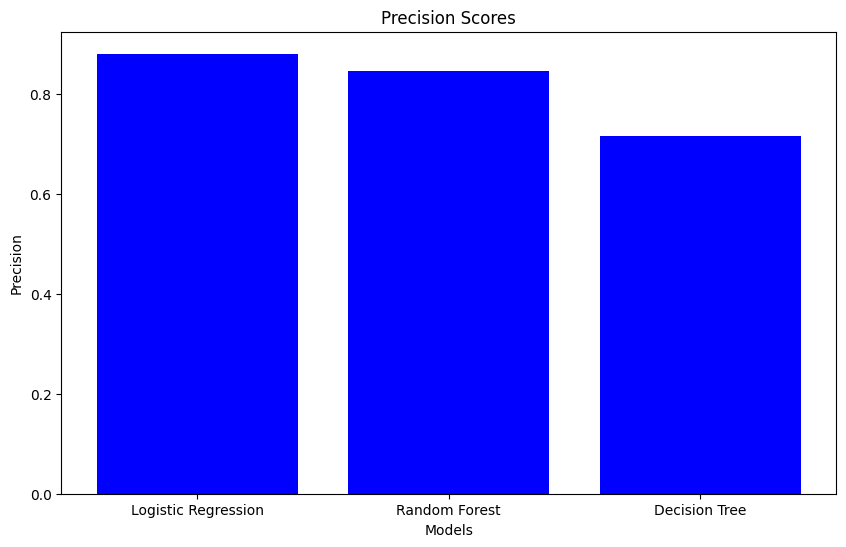

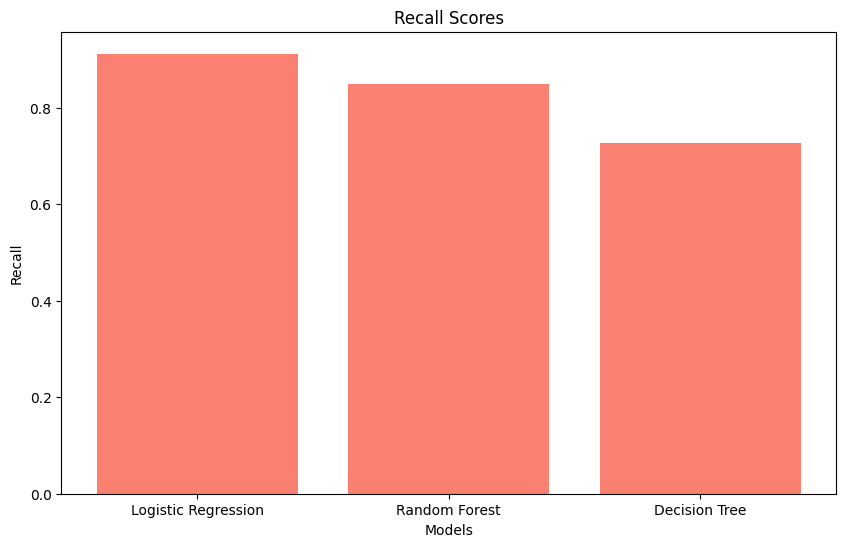

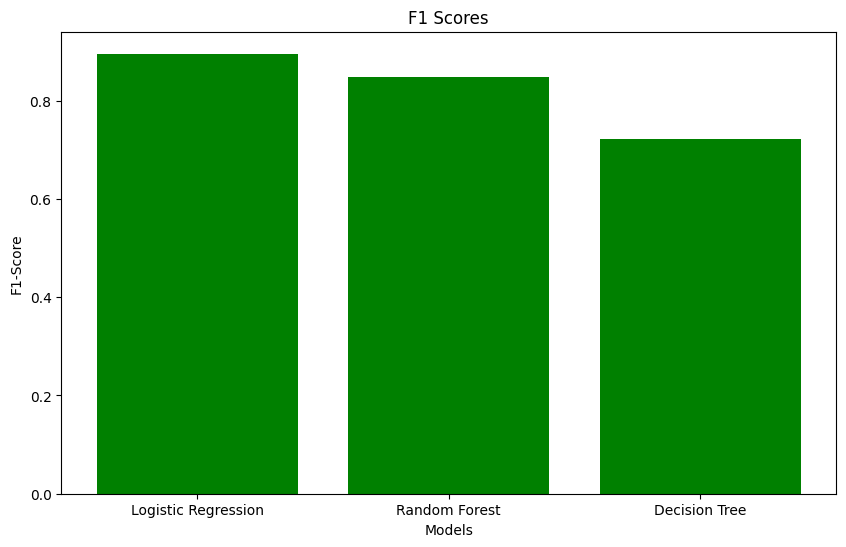

In [12]:
#Bar Chart Models
models = ['Logistic Regression', 'Random Forest', 'Decision Tree']
precisions = [precision_lr, precision_rf, precision_dt]
recalls = [recall_lr, recall_rf, recall_dt]
f1_scores = [f1_lr, f1_rf, f1_dt]
  #Precision Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(models, precisions, color='blue')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Precision Scores')
plt.show()
  #Recall Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(models, recalls, color='salmon')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Recall Scores')
plt.show()

  #F1 Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(models, f1_scores, color='green')
plt.xlabel('Models')
plt.ylabel('F1-Score')
plt.title('F1 Scores')
plt.show()
###NO VISUALIZATIONS FOR NEW ML MODELS - JUST PRINT RESULTS

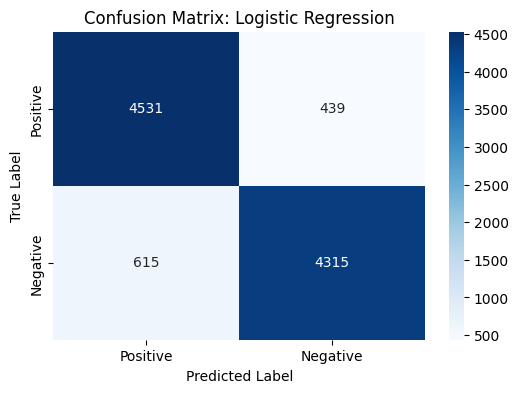

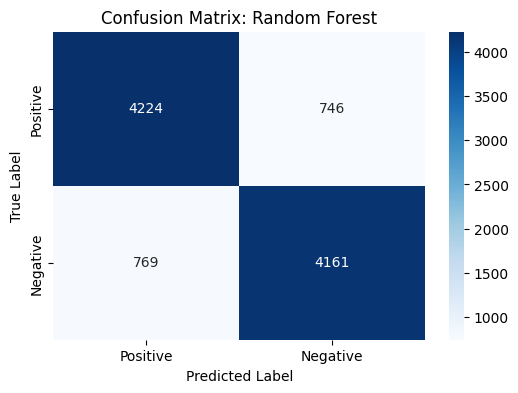

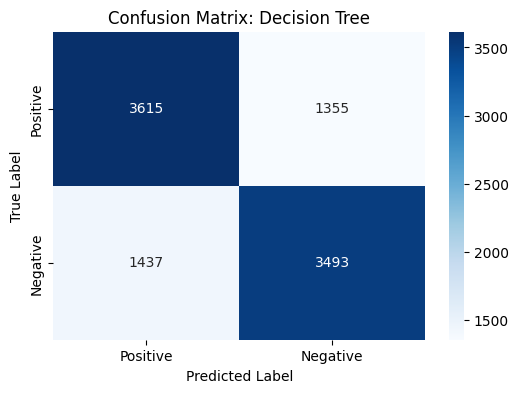

In [13]:
#Confusion Matrix Models
#List of models
models = ['Logistic Regression', 'Random Forest', 'Decision Tree']
predictions = [y_test_pred_lr, y_test_pred_rf, y_test_pred_dt]

for model_name, y_pred in zip(models, predictions):
    cm = confusion_matrix(y_test, y_pred, labels=['positive', 'negative'])

    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.show()